In [214]:
import numpy as np
import pandas as pd
import random

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score as r2
from sklearn.model_selection import KFold, GridSearchCV

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
matplotlib.rcParams.update({'font.size': 14})

Создадим функцию для оценки качества обученной модели по коэффициенту детерминации.

In [9]:
def evaluate_preds(train_true_values, train_pred_values, test_true_values, test_pred_values):
    '''
    
    '''
    print("Train R2:\t" + str(round(r2(train_true_values, train_pred_values), 3)))
    print("Test R2:\t" + str(round(r2(test_true_values, test_pred_values), 3)))
    
    plt.figure(figsize=(18,10))
    
    plt.subplot(121)
    sns.scatterplot(x=train_pred_values, y=train_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Train sample prediction')
    
    plt.subplot(122)
    sns.scatterplot(x=test_pred_values, y=test_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Test sample prediction')

    plt.show()

In [10]:
TRAIN_DATASET_PATH = 'C:/Users/Workstation/Desktop/MyProjects/DS_Real_Estate_Price_Prediction/train.csv'
TEST_DATASET_PATH = 'C:/Users/Workstation/Desktop/MyProjects/DS_Real_Estate_Price_Prediction/test.csv'

**Описание датасета**

* **Id** - идентификационный номер квартиры
* **DistrictId** - идентификационный номер района
* **Rooms** - количество комнат
* **Square** - площадь
* **LifeSquare** - жилая площадь
* **KitchenSquare** - площадь кухни
* **Floor** - этаж
* **HouseFloor** - количество этажей в доме
* **HouseYear** - год постройки дома
* **Ecology_1, Ecology_2, Ecology_3** - экологические показатели местности
* **Social_1, Social_2, Social_3** - социальные показатели местности
* **Healthcare_1, Helthcare_2** - показатели местности, связанные с охраной здоровья
* **Shops_1, Shops_2** - показатели, связанные с наличием магазинов, торговых центров
* **Price** - цена квартиры

Просмотрим набор данных

In [143]:
train_df = pd.read_csv(TRAIN_DATASET_PATH)
train_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [106]:
test_df = pd.read_csv(TEST_DATASET_PATH)
test_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,B,B,11,2748,1,NaN,0,0,B
1,15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,B,B,23,4583,3,NaN,3,3,B
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A


In [144]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

 Посмотрим распределение целевой перемнной

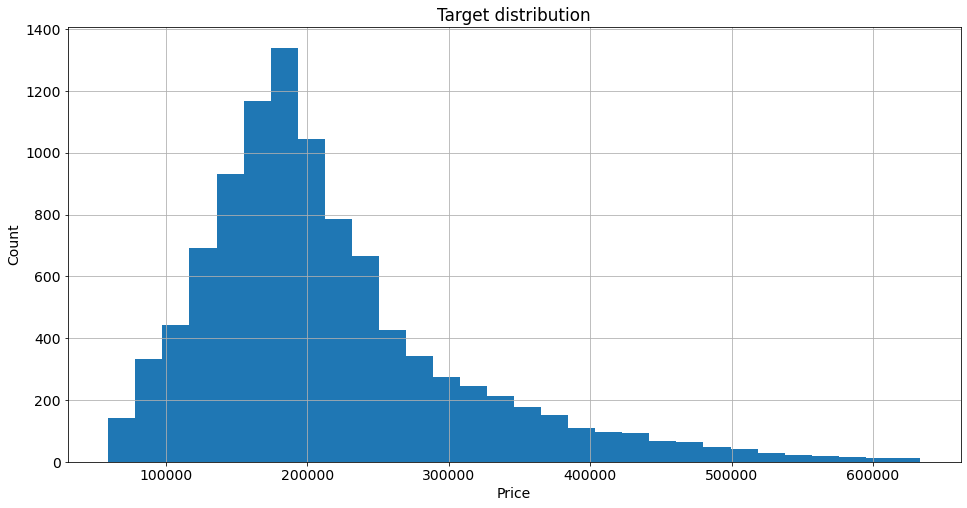

In [145]:
plt.figure(figsize = (16, 8))

train_df['Price'].hist(bins=30)
plt.ylabel('Count')
plt.xlabel('Price')

plt.title('Target distribution')
plt.show()

Распределение адекватное, подозрительных значений не наблюдается.

Обработка выбросов.

In [146]:
train_df.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


Логично, что на стоимость квартиры из приведенного набора данных наибольшим образом влияет площадь, жилая площадь и площадь кухни. Если внимательно посмотреть на признак Square, то подозрительным кажется максимум, равный 641; аналогчино с LifeSquare - если общая максимальная площадь всё же равна 641м, то жилая приэтом 7480м быть не может. Вероятно, это ошибочные значения. То же самое наблюдается в значениях признака KitchenSquare.   
Удалим из датасета все экстремальные значения, выходящие за 99ый и 1ый квантили.

In [147]:
train_df = train_df[train_df['Square'].isnull() |
                    (train_df['Square'] < train_df['Square'].quantile(.99)) &
                    (train_df['Square'] > train_df['Square'].quantile(.01))]

train_df = train_df[train_df['LifeSquare'].isnull() |
                    (train_df['LifeSquare'] < train_df['LifeSquare'].quantile(.99)) &
                    (train_df['LifeSquare'] > train_df['LifeSquare'].quantile(.01))]

train_df = train_df[train_df['KitchenSquare'].isnull() |
                    (train_df['KitchenSquare'] < train_df['KitchenSquare'].quantile(.99)) &
                    (train_df['KitchenSquare'] > train_df['KitchenSquare'].quantile(.01))]

Оценим изменения статистик:

In [148]:
train_df.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,8881.000000,8881.000000,8881.000000,8881.000000,7296.000000,8881.000000,8881.000000,8881.000000,8.881000e+03,8881.000000,8881.000000,8881.000000,8881.000000,4799.000000,8881.000000,8881.000000,8881.000000
mean,8396.033893,52.124536,1.888076,54.809487,34.830304,6.075329,8.446684,12.826934,4.242532e+03,0.119620,26.071163,5630.480014,8.403783,1156.072932,1.392636,4.438577,214939.479049
std,4870.809524,44.498118,0.826691,16.225349,14.280535,3.503611,5.133763,6.369206,2.127571e+05,0.119654,17.269698,3977.902810,24.295214,1032.814421,1.492092,4.837340,89654.209673
min,2.000000,0.000000,0.000000,29.719934,2.941437,1.000000,1.000000,0.000000,1.914000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4166.000000,20.000000,1.000000,41.637555,22.863805,1.000000,4.000000,9.000000,1.972000e+03,0.017647,10.000000,2370.000000,0.000000,325.000000,0.000000,1.000000,156934.440088
50%,8403.000000,40.000000,2.000000,51.656012,32.459931,6.000000,7.000000,14.000000,1.977000e+03,0.075779,25.000000,5562.000000,2.000000,990.000000,1.000000,3.000000,194240.534503
75%,12635.000000,80.000000,2.000000,64.720916,44.119769,9.000000,12.000000,17.000000,2.000000e+03,0.194489,36.000000,7614.000000,5.000000,1548.000000,3.000000,6.000000,250381.580780
max,16798.000000,209.000000,19.000000,117.855969,88.381356,14.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


Полученные значения максимальных площадей получились вполне адвекватными, подозрений не вызывают, однако если обратить внимание на минимальные, очевидно, что у кухни не может быть площади 1 м, а жилая площадь не может быть равна 2,9м. Заменим минимальные значения этих площадей на 3 и 10 соответственно:

In [149]:
train_df.loc[train_df['LifeSquare'] < 10, 'LifeSquare'] = 10
train_df.loc[train_df['KitchenSquare'] < 3, 'KitchenSquare'] = 3

Также видно, что в наборе данных встречаются квартиры, общая площадь которых меньше суммы площадей кухни и комнат. 

In [150]:
mask = train_df.loc[train_df['Square'] < train_df['KitchenSquare'] + train_df['LifeSquare'], ['Square','LifeSquare','KitchenSquare']]
mask

,Square,LifeSquare,KitchenSquare
3,53.352981,52.731512,9.0
14,53.769097,52.408027,3.0
28,42.530043,43.967759,3.0
48,47.080100,46.807989,12.0
69,64.929103,63.304605,10.0
...,...,...,...
9903,32.879523,30.397748,3.0
9906,39.894107,38.231623,3.0
9951,33.516313,31.086243,3.0
9974,33.227093,32.639166,3.0


Найдем среднюю долю жилой площади в квартире и приведем LifeSquare в выбросах в соответствии с полученным значением.

In [151]:
s = train_df.loc[train_df['Square'] > train_df['KitchenSquare'] + train_df['LifeSquare'], ['Square','LifeSquare','KitchenSquare']]
part = (s['LifeSquare']/s['Square']).mean()
train_df.loc[train_df['Square'] < train_df['KitchenSquare'] + train_df['LifeSquare'], ['LifeSquare']] = train_df['Square']*part
mask

,Square,LifeSquare,KitchenSquare
3,53.352981,52.731512,9.0
14,53.769097,52.408027,3.0
28,42.530043,43.967759,3.0
48,47.080100,46.807989,12.0
69,64.929103,63.304605,10.0
...,...,...,...
9903,32.879523,30.397748,3.0
9906,39.894107,38.231623,3.0
9951,33.516313,31.086243,3.0
9974,33.227093,32.639166,3.0


Рассмотрим признак Rooms:

In [152]:
train_df['Rooms'].value_counts()

2.0     3533
1.0     3250
3.0     1973
4.0      112
5.0        8
10.0       2
19.0       1
0.0        1
6.0        1
Name: Rooms, dtype: int64

Значения 0, 10 и 19 - подозрительные, вряд ли в квартире может быть такое количество комнат. Заменим их на медианы:

In [153]:
train_df.loc[train_df['Rooms'].isin([0, 10, 19]), 'Rooms'] = train_df['Rooms'].median()

Рассмотрим признаки HouseFloor и Floor

In [154]:
train_df['HouseFloor'].sort_values().unique()

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  32.,  37.,
        39.,  40.,  44.,  45.,  48.,  99., 117.])

In [155]:
train_df['Floor'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 31, 32, 33, 42],
      dtype=int64)

Заменим выбросы на медиану.

In [156]:
train_df.loc[train_df['HouseFloor'] == 0, 'HouseFloor'] = train_df['HouseFloor'].median()
train_df.loc[train_df['HouseFloor'] == 117, 'HouseFloor'] = train_df['HouseFloor'].median()
train_df.loc[train_df['HouseFloor'] == 99, 'HouseFloor'] = train_df['HouseFloor'].median()

 Проверим, есть ли квартиры, находящиеся выше последнего этажа в доме, и укажем рандомный этаж в рамках высоты дома.

In [157]:
floor_outliers = train_df[train_df['Floor'] > train_df['HouseFloor']].index

train_df.loc[floor_outliers, 'Floor'] = train_df.loc[floor_outliers, 'HouseFloor'].apply(lambda x: random.randint(1, x))

Рассмотрим признак HouseYear

In [158]:
train_df['HouseYear'].sort_values(ascending=False)

1497    20052011
4189        4968
2493        2020
9674        2020
4376        2020
          ...   
8144        1917
1380        1917
5053        1917
7611        1916
910         1914
Name: HouseYear, Length: 8881, dtype: int64

В признаке очевидны выбросы, сразу заменим их:

In [159]:
train_df.loc[train_df['HouseYear'] > 2020, 'HouseYear'] = 2020

Обработаем пропуски в данных:

In [160]:
len(train_df) - train_df.count()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       1585
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4082
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

Вычислим жилую площадь в местах пропусков используя полученный ранее коэффийиент part:

In [161]:
train_df.loc[train_df['LifeSquare'].isnull(), 'LifeSquare'] = train_df['Square']*part

In [162]:
train_df['Healthcare_1'].head()

0       NaN
1     240.0
3    1084.0
4    2078.0
5     990.0
Name: Healthcare_1, dtype: float64

Пропуски в признаке Healthcare_1 заменим на медиану

In [163]:
train_df.loc[train_df['Healthcare_1'].isnull(), 'Healthcare_1'] = train_df['Healthcare_1'].median()

В наборе данных есть несколько категориальных признаков:

In [164]:
cat_colnames = train_df.select_dtypes(include='object').columns.tolist()
cat_colnames

['Ecology_2', 'Ecology_3', 'Shops_2']

Посмотрим, какие значения имеют эти признаки:

In [165]:
for cat_colname in cat_colnames:
    print(str(cat_colname) + '\n' + str(train_df[cat_colname].value_counts()) + '\n')

Ecology_2
B    8792
A      89
Name: Ecology_2, dtype: int64

Ecology_3
B    8614
A     267
Name: Ecology_3, dtype: int64

Shops_2
B    8254
A     627
Name: Shops_2, dtype: int64



Заменим числами 0 и 1 значения категориальных признаков.

In [166]:
train_df['Ecology_2_bin'] = train_df['Ecology_2'].replace({'A':0, 'B':1})
train_df['Ecology_3_bin'] = train_df['Ecology_3'].replace({'A':0, 'B':1})
train_df['Shops_2_bin'] = train_df['Shops_2'].replace({'A':0, 'B':1})

Рассмторим признак DistrictId

In [167]:
district_size = train_df['DistrictId'].value_counts().reset_index()\
               .rename(columns={'index':'DistrictId', 'DistrictId':'DistrictSize'})
district_size.head()

,DistrictId,DistrictSize
0,27,628
1,1,537
2,23,449
3,6,396
4,9,279


Добавим признак "количество объектов", которые встретились в выборке

In [168]:
train_df = train_df.merge(district_size, on='DistrictId', how='left')
train_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,Ecology_2_bin,Ecology_3_bin,Shops_2_bin,DistrictSize
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,...,5,990.0,0,11,B,184966.930730,1,1,1,20
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,...,1,240.0,1,16,B,300009.450063,1,1,1,86
2,5809,58,2.0,53.352981,32.060133,9.0,8,17.0,1977,0.437885,...,3,1084.0,0,5,B,175616.227217,1,1,1,146
3,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,...,1,2078.0,2,4,B,150226.531644,1,1,1,95
4,12915,59,3.0,80.384479,46.683720,12.0,5,17.0,2011,0.309479,...,4,990.0,0,6,B,215898.447742,1,1,1,54


Посмотрим медианную стоимость квартиры с фиксированным количеством комнат в каждом районе и добавим этот признак в набор данных:

In [169]:
med_price_by_district = train_df.groupby(['DistrictId', 'Rooms'], as_index=False).agg({'Price':'median'})\
                       .rename(columns={'Price':'MedPriceByDistrict'})
med_price_by_district.head()

,DistrictId,Rooms,MedPriceByDistrict
0,0,1.0,147258.736617
1,0,2.0,176210.812334
2,0,3.0,300610.359425
3,1,1.0,146154.352249
4,1,2.0,202944.331497


In [170]:
train_df = train_df.merge(med_price_by_district, on=['DistrictId', 'Rooms'], how='left')
train_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,Ecology_2_bin,Ecology_3_bin,Shops_2_bin,DistrictSize,MedPriceByDistrict
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,...,990.0,0,11,B,184966.930730,1,1,1,20,203384.328026
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,...,240.0,1,16,B,300009.450063,1,1,1,86,300009.450063
2,5809,58,2.0,53.352981,32.060133,9.0,8,17.0,1977,0.437885,...,1084.0,0,5,B,175616.227217,1,1,1,146,169246.115943
3,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,...,2078.0,2,4,B,150226.531644,1,1,1,95,158791.017955
4,12915,59,3.0,80.384479,46.683720,12.0,5,17.0,2011,0.309479,...,990.0,0,6,B,215898.447742,1,1,1,54,384517.540046


##### Переносим все преобразования на тестовый набор данных:

In [107]:
test_df['Rooms'].value_counts()

2.0     2030
1.0     1769
3.0     1099
4.0       90
5.0        7
0.0        2
6.0        2
17.0       1
Name: Rooms, dtype: int64

In [108]:
test_df.loc[test_df['Rooms'].isin([0,17]), 'Rooms'] = test_df['Rooms'].median()

In [109]:
test_df['HouseFloor'].sort_values().unique()

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 36., 37., 39., 40.,
       48., 99.])

In [111]:
test_df['Floor'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 31, 32, 33, 34, 38, 46,
       78], dtype=int64)

In [112]:
test_df.loc[test_df['HouseFloor'] == 0, 'HouseFloor'] = test_df['HouseFloor'].median()
test_df.loc[test_df['HouseFloor'] == 99, 'HouseFloor'] = test_df['HouseFloor'].median()

In [113]:
floor_outliers = test_df[test_df['Floor'] > test_df['HouseFloor']].index
test_df.loc[floor_outliers, 'Floor'] = test_df.loc[floor_outliers, 'HouseFloor'].apply(lambda x: random.randint(1, x))

In [114]:
test_df['HouseYear'].sort_values(ascending=False)

4389    2020
4273    2020
888     2020
3255    2020
1039    2020
        ... 
1475    1912
64      1911
2691    1910
2       1909
3253    1908
Name: HouseYear, Length: 5000, dtype: int64

In [130]:
test_df = test_df.merge(med_price_by_district, on=['DistrictId', 'Rooms'], how='left')

In [131]:
test_df = test_df.merge(district_size, on='DistrictId', how='left')

In [116]:
test_df = test_df[test_df['Square'].isnull() |
                    (test_df['Square'] < test_df['Square'].quantile(.99)) &
                    (test_df['Square'] > test_df['Square'].quantile(.01))]

test_df = test_df[test_df['LifeSquare'].isnull() |
                    (test_df['LifeSquare'] < test_df['LifeSquare'].quantile(.99)) &
                    (test_df['LifeSquare'] > test_df['LifeSquare'].quantile(.01))]

test_df = test_df[test_df['KitchenSquare'].isnull() |
                    (test_df['KitchenSquare'] < test_df['KitchenSquare'].quantile(.99)) &
                    (test_df['KitchenSquare'] > test_df['KitchenSquare'].quantile(.01))]

In [118]:
test_df.loc[test_df['LifeSquare'] < 10, 'LifeSquare'] = 10
test_df.loc[test_df['KitchenSquare'] < 3, 'KitchenSquare'] = 3
test_df.loc[test_df['Square'] < test_df['KitchenSquare'] + test_df['LifeSquare'], ['LifeSquare']] = test_df['Square']*part
test_df.loc[test_df['LifeSquare'].isnull(), 'LifeSquare'] = test_df['Square']*part

In [120]:
test_df['Ecology_2_bin'] = test_df['Ecology_2'].replace({'A':0, 'B':1})
test_df['Ecology_3_bin'] = test_df['Ecology_3'].replace({'A':0, 'B':1})
test_df['Shops_2_bin'] = test_df['Shops_2'].replace({'A':0, 'B':1})

In [121]:
test_df.loc[test_df['Healthcare_1'].isnull(), 'Healthcare_1'] = test_df['Healthcare_1'].median()

In [133]:
test_df.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Ecology_2_bin,Ecology_3_bin,Shops_2_bin,MedPriceByDistrict,DistrictSize
count,4447.000000,4447.000000,4447.000000,4447.000000,4447.000000,4447.000000,4447.000000,4447.000000,4447.000000,4447.000000,...,4447.000000,4447.000000,4447.000000,4447.000000,4447.000000,4447.000000,4447.000000,4447.000000,4384.000000,4440.000000
mean,8400.505509,52.867101,1.905779,55.150882,33.191512,6.561727,7.460085,12.785248,1984.030358,0.120233,...,5644.405892,8.627839,1041.579267,1.389926,4.431527,0.989881,0.968518,0.926018,211832.940069,177.632207
std,4828.799684,45.003365,0.790395,16.344318,11.211786,2.735153,5.070592,6.173710,18.520131,0.119908,...,3998.022400,24.352123,785.756921,1.481773,4.811164,0.100095,0.174636,0.261772,69035.709140,193.932310
min,3.000000,0.000000,1.000000,30.062518,10.000000,3.000000,1.000000,1.000000,1910.000000,0.000000,...,168.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,78030.684516,1.000000
25%,4223.000000,21.000000,1.000000,41.774920,23.668904,4.000000,4.000000,9.000000,1972.000000,0.019509,...,2370.000000,0.000000,800.000000,0.000000,1.000000,1.000000,1.000000,1.000000,169121.013931,44.000000
50%,8318.000000,41.000000,2.000000,52.034775,31.954384,6.000000,6.000000,12.000000,1977.000000,0.075779,...,5562.000000,2.000000,900.000000,1.000000,3.000000,1.000000,1.000000,1.000000,198460.869611,86.000000
75%,12576.500000,81.000000,2.000000,65.322366,40.509288,9.000000,10.000000,17.000000,1999.000000,0.195781,...,7614.000000,5.000000,1036.000000,3.000000,6.000000,1.000000,1.000000,1.000000,239606.501593,279.000000
max,16795.000000,211.000000,5.000000,115.008223,81.329808,13.000000,46.000000,48.000000,2020.000000,0.521867,...,19083.000000,141.000000,4849.000000,6.000000,23.000000,1.000000,1.000000,1.000000,593618.746096,628.000000


##### Отбор признаков

In [134]:
train_df.columns.tolist()

['Id',
 'DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Ecology_2',
 'Ecology_3',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1',
 'Shops_2',
 'Price',
 'Ecology_2_bin',
 'Ecology_3_bin',
 'Shops_2_bin',
 'DistrictSize_x',
 'DistrictSize_y',
 'MedPriceByDistrict']

In [135]:
feature_names = ['Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear',
                 'Ecology_1', 'Ecology_2_bin', 'Ecology_3_bin', 'Social_1', 'Social_2', 'Social_3',
                 'Healthcare_1', 'Helthcare_2', 'Shops_1', 'Shops_2_bin']

new_feature_names = ['IsDistrictLarge', 'MedPriceByDistrict']

target_name = 'Price'

In [171]:
train_df.shape

(8881, 25)

In [137]:
test_df.shape

(4447, 24)

In [142]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4447 entries, 0 to 4446
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  4447 non-null   int64  
 1   DistrictId          4447 non-null   int64  
 2   Rooms               4447 non-null   float64
 3   Square              4447 non-null   float64
 4   LifeSquare          4447 non-null   float64
 5   KitchenSquare       4447 non-null   float64
 6   Floor               4447 non-null   int64  
 7   HouseFloor          4447 non-null   float64
 8   HouseYear           4447 non-null   int64  
 9   Ecology_1           4447 non-null   float64
 10  Ecology_2           4447 non-null   object 
 11  Ecology_3           4447 non-null   object 
 12  Social_1            4447 non-null   int64  
 13  Social_2            4447 non-null   int64  
 14  Social_3            4447 non-null   int64  
 15  Healthcare_1        4447 non-null   float64
 16  Helthc

##### Разбиение на train и test

In [173]:
new_feature_names.remove("IsDistrictLarge")

ValueError: list.remove(x): x not in list

In [174]:
X = train_df[feature_names + new_feature_names]
y = train_df[target_name]

In [175]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=21)

### Построение модели

##### Обучение и оценка модели RandomForestRegressor

In [227]:
rf_model3 = RandomForestRegressor(criterion='mse',
                                 max_depth=50, # глубина дерева  
                                 min_samples_leaf=100, # минимальное кол-во наблюдений в листе дерева
                                 random_state=42,
                                 n_estimators=150  # кол-во деревьев
                                 )

In [228]:
rf_model3.fit(X_train, y_train)

RandomForestRegressor(max_depth=50, min_samples_leaf=100, n_estimators=150,
                      random_state=42)

Train R2:	0.776
Test R2:	0.685


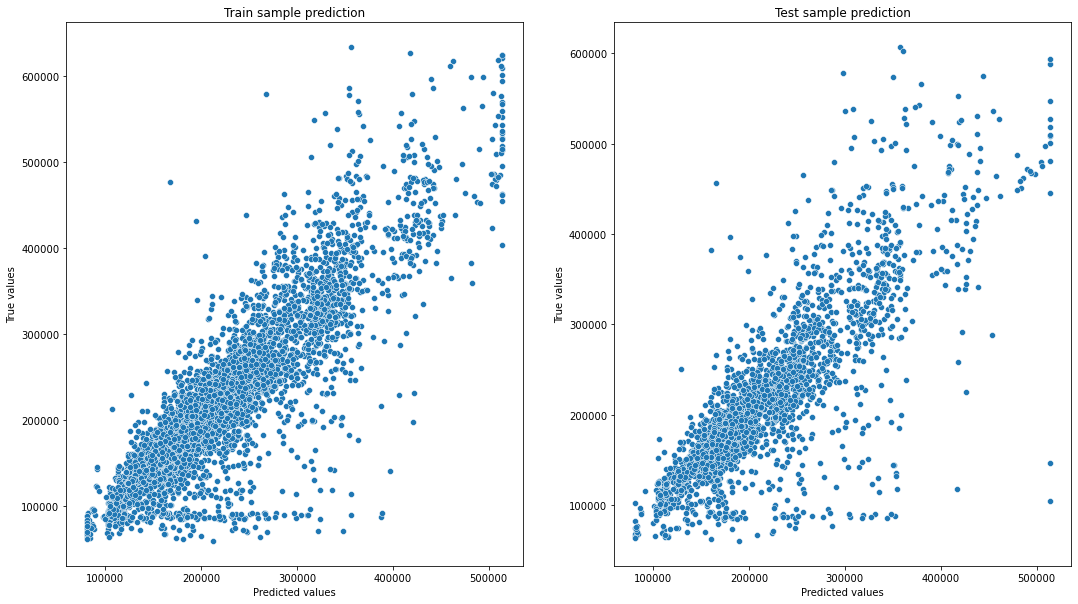

In [226]:
y_train_preds = rf_model3.predict(X_train)
y_test_preds = rf_model3.predict(X_test)
evaluate_preds(y_train, y_train_preds, y_test, y_test_preds)

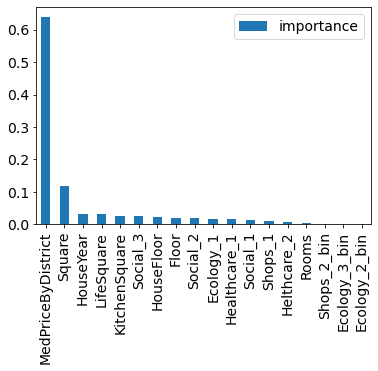

In [200]:
rf_base_importance = pd.DataFrame({'feature': X_train.columns, 'importance': rf_model.feature_importances_})
rf_base_importance = rf_base_importance.sort_values(by='importance', ascending=False)
rf_base_importance.reset_index(drop=True).plot(kind='bar')
plt.xticks(ticks=range(rf_base_importance.shape[0]), labels=rf_base_importance.feature,size=14)
plt.show()

##### Обучение и оценка модели GradientBoostingRegressor

In [217]:
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)


GradientBoostingRegressor()

Train R2:	0.802
Test R2:	0.702


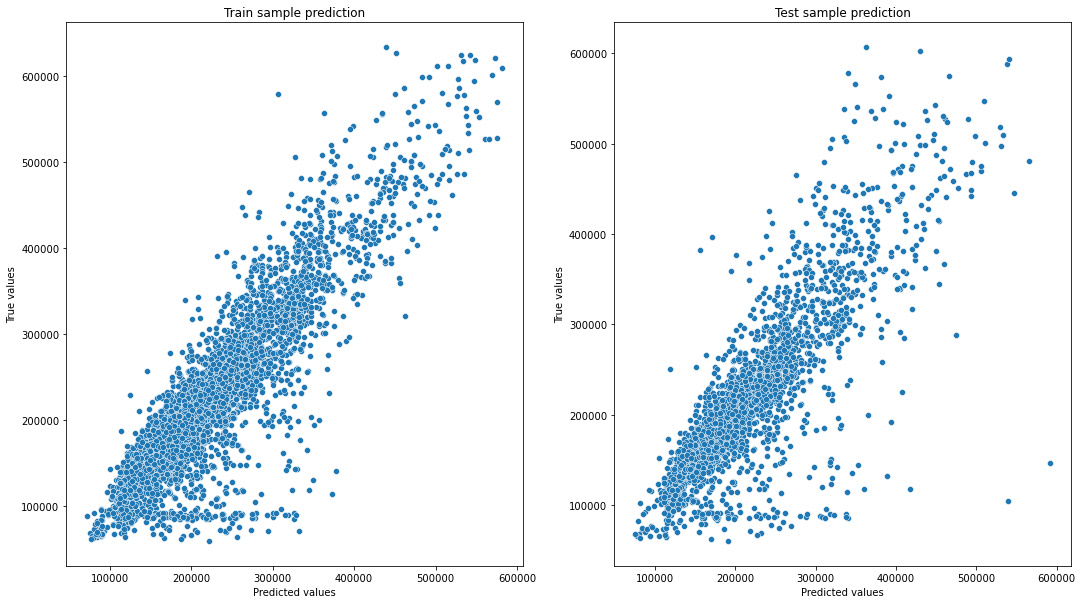

In [219]:
y_train_preds = gb_model.predict(X_train)
y_test_preds = gb_model.predict(X_test)
evaluate_preds(y_train, y_train_preds, y_test, y_test_preds)

In [221]:
gb_model=GradientBoostingRegressor(random_state=33)

In [222]:
params = {'n_estimators': [50, 100, 200, 400],
         'max_depth': [3, 5 , 7 ,10]}

In [223]:
gs = GridSearchCV(gb_model, params, scoring='r2', cv=KFold(n_splits=3, random_state=33, shuffle=True), n_jobs=-1)

In [240]:
gs.fit(X,y)

GridSearchCV(cv=KFold(n_splits=3, random_state=33, shuffle=True),
             estimator=GradientBoostingRegressor(random_state=33), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 10],
                         'n_estimators': [50, 100, 200, 400]},
             scoring='r2')

In [241]:
gs.best_params_

{'max_depth': 5, 'n_estimators': 100}

In [242]:
gs.best_score_

0.7453422849755671

In [243]:
gb_model2=GradientBoostingRegressor(random_state=33, n_estimators=100, max_depth=5)

In [244]:
gb_model2.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=5, random_state=33)

Train R2:	0.885
Test R2:	0.716


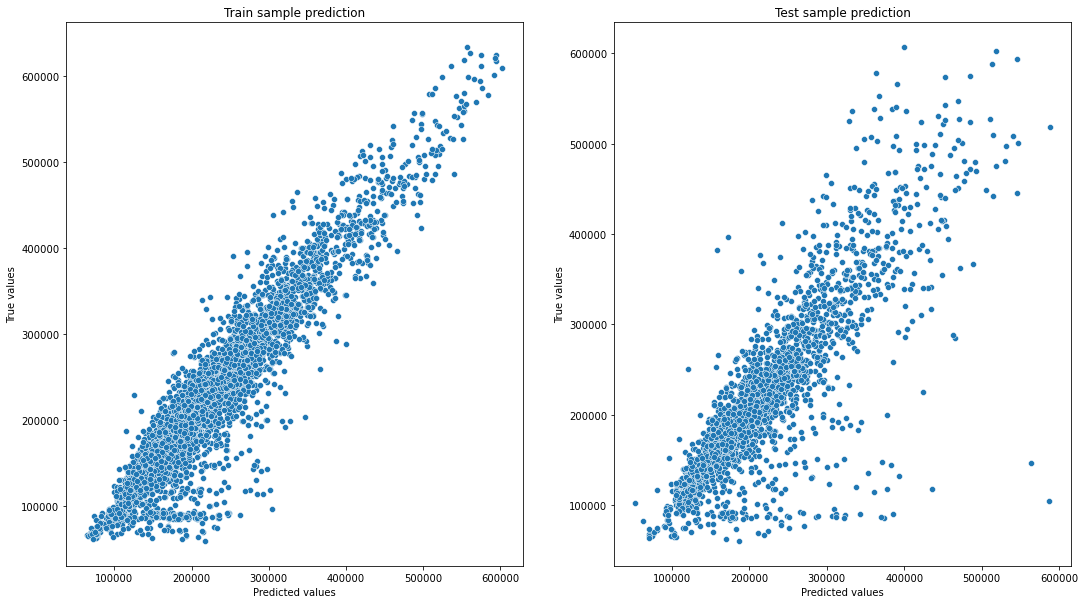

In [245]:
y_train_preds = gb_model2.predict(X_train)
y_test_preds = gb_model2.predict(X_test)
evaluate_preds(y_train, y_train_preds, y_test, y_test_preds)

Лучше работает модель GradientBoostingRegressor с параметрами n_estimators=100 и max_depth=5. Не успела попробовать другие и изменить признаки.